# Create


In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *


In [2]:
%matplotlib widget


In [3]:
ac = 0.81271 # 0.81271 # 8.1271e-15 # scattering radius in 1e-12 cm
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity
l_max = 12      # highest order l-wave to consider

Ta_pair = syndat.particle_pair(ac, M, m, I, i, l_max)

Ta_pair.map_quantum_numbers(True)



The following arrays describe all possible spin groups for a each parity.
    The data is given as a tuple where the first value is the integer 
    or half integer total quantum spin J and the second value is the 
    number of entrance channels for that spin group. 
    * See the dictionary "possible_Jpi" for a nested packing structure.

Spin group data for negative parity
(J-, #Chs, l-waves)
(0.0, 1, [3.0])
(1.0, 3, [3.0, 3.0, 5.0])
(2.0, 5, [1.0, 3.0, 3.0, 5.0, 5.0])
(3.0, 7, [1.0, 1.0, 3.0, 3.0, 5.0, 5.0, 7.0])
(4.0, 8, [1.0, 1.0, 3.0, 3.0, 5.0, 5.0, 7.0, 7.0])
(5.0, 8, [1.0, 3.0, 3.0, 5.0, 5.0, 7.0, 7.0, 9.0])
(6.0, 8, [3.0, 3.0, 5.0, 5.0, 7.0, 7.0, 9.0, 9.0])
(7.0, 8, [3.0, 5.0, 5.0, 7.0, 7.0, 9.0, 9.0, 11.0])
(8.0, 8, [5.0, 5.0, 7.0, 7.0, 9.0, 9.0, 11.0, 11.0])
(9.0, 7, [5.0, 7.0, 7.0, 9.0, 9.0, 11.0, 11.0])
(10.0, 6, [7.0, 7.0, 9.0, 9.0, 11.0, 11.0])
(11.0, 5, [7.0, 9.0, 9.0, 11.0, 11.0])
(12.0, 4, [9.0, 9.0, 11.0, 11.0])
(13.0, 3, [9.0, 11.0, 11.0])
(14.0, 2, [11.0, 11.0])
(

In [4]:
# average_parameters, parameters = syndat.sammy_interface.read_sammy_par('../synthetic_data/Ta181/endf_eval/SAMQUA.PAR')
# # print(average_parameters);# print(parameters)

# # size of these averages must be the same size as Jpi mapping!\
# Davg = [list([average_parameters.dE[1]])*len(pair.Jn), list([average_parameters.dE[1]])*len(pair.Jp)]
# Ggavg = [list([average_parameters.Gg[1]])*len(pair.Jn), list([average_parameters.Gn[1]])*len(pair.Jp)]
# Gnavg = [list([average_parameters.Gn[1]])*len(pair.Jn), list([average_parameters.Gn[1]])*len(pair.Jp)]
# # Davg = [list(), list([average_parameters.dE[1],average_parameters.dE[2]])]
# # Ggavg = [list(), list([average_parameters.Gg[1],average_parameters.Gg[2]])]
# # Gnavg = [list(), list([average_parameters.Gn[1],average_parameters.Gn[2]])]

# RRR_Erange = [10, 50]

# pair.sample_all_Jpi(RRR_Erange, 
#                         Davg, Ggavg, Gnavg,
#                         save_csv = False, 
#                         sammy_run_folder = os.getcwd())

# pair.map_quantum_numbers(True)

In [5]:

# pair.Jp[0][0]
# ### !!! need to correct the way pair.Jp/Jn are stored so that I can loop through even just a single spin group!
# test = [[3.0, 1, [0.0]],]

# for j in test:
#     print(j[0])
# # for j, resonance_ladder in zip(pair.Jp[0], pair.Jp_resonances):
# #     print(j[0], resonance_ladder)
# resonance_ladder = pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}) 
# test = pair.Jp_resonances



# np.sqrt(E/E_lambda)
# np.sqrt(E/E_lambda) - (np.sqrt(E**3/E_lambda**3))


## Analysis for Ta181



In [6]:
sammy_calculated = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/verify_slbw/SAMMY_elastic.LST')
sammy_cap = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/verify_slbw/SAMMY_capture.LST')
sammy_total = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/verify_slbw/SAMMY_total.LST')
# test = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/verify_slbw/SAMMY.LST')
E = sammy_calculated.E


g = syndat.scattering_theory.g(3, Ta_pair.I, Ta_pair.i) #(2*J+1)/( (2*ii+1)*(2*I+1) );   # spin statistical factor g sub(j alpha)
k = syndat.scattering_theory.k_wavenumber(E,Ta_pair.M, Ta_pair.m) # syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
rho = k*ac
psi = rho

# my_resonance_ladder = [pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}), ]
my_resonance_ladder = [pd.DataFrame({'E':[21.54920000], 'Gg':[82.0092930], '0':[0.23514800]}), ]

xs_cap = syndat.scattering_theory.SLBW_capture(g, k, E, my_resonance_ladder[0])


# single_spin_group = [[3.0, 1, [0.0]],]  # make this a list so it can be looped through
# xs_scat = 0 
# GG_d=0; GE_d=0
# for index, row in my_resonance_ladder[0].iterrows():
#     E_lambda = row.E
#     Gn = sum([row[ign] for ign in range(2,len(row))]) * np.sqrt(E/E_lambda)* 1e-3
#     Gg = row.Gg * 1e-3

#     d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
#     GG_d += Gn*(Gn+Gg)/d
#     GE_d += Gn*(E-E_lambda)/d


E_lambda = 21.54920000
Gn = 0.23514800 * np.sqrt(E/E_lambda)* 1e-3
Gg = 82.0092930 * 1e-3

d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
GG_d = Gn*(Gn+Gg)/d
GE_d = Gn*(E-E_lambda)/d

xs_scat = (np.pi*g/k**2) * ((1-np.cos(2*psi))*(2-GG_d) + 2*np.sin(2*psi)*GE_d + GE_d**2 + (GG_d/2)**2)

xs_tot = xs_scat + xs_cap


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


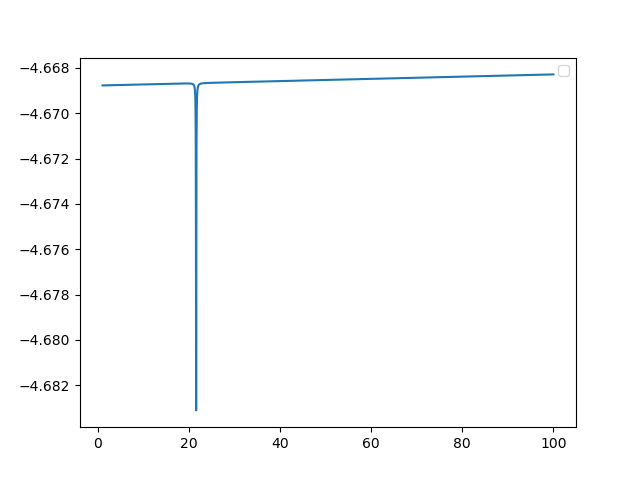

In [7]:

figure()
# plot(E,xs_scat, label='syndat') # 4.67
# plot(sammy_calculated.E, sammy_calculated.theo_xs, label='sammy')
# plot(test.E, test.exp_dat, label='sammy')
# # plot(E,1.4e-2/E, 'c', label='1/E')
# plot(E,3e-3/np.sqrt(E), 'orange', label='1/sqrt(E)')
# plot(E, xs_scat-sammy_calculated.theo_xs)


# plot(E,xs_cap, label='syndat') #
# plot(E,xs_cap-sammy_cap.theo_xs, 'c', label='1/E')
# plot(sammy_cap.E, sammy_cap.theo_xs, label='sammy')


# plot(E,xs_tot+4.67)
plot(sammy_total.E, xs_tot-sammy_total.theo_xs)

# xscale('log')
# yscale('log')
legend()



In [8]:


# # E = sammy_cap.E
# # my_resonance_ladder = [pd.DataFrame({'E':[2105.151608],'Gg':[506.740813], 'Gn':[20317.7426]}), ]
# # single_spin_group = [[1.0, 1, [0.0]],]

# # resonance_ladder = pair.Jp_resonances[0]
# # E = sammy_calculated.E[sammy_calculated.E<100] #np.linspace(1,100,1000)
# my_resonance_ladder = [pd.DataFrame({'E':[21.54920000], 'Gg':[82.0092930], '0':[0.23514800]}), ]
# # my_resonance_ladder = [pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}), ] # make this a list so it can be looped through
# # 41.91070000 124.412524 0.25549100 0.00000000 0.00000000 0 0 0 0 0 1
# # single_spin_group = [[3.0, 1, [0.0]],]  # make this a list so it can be looped through

# k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
# P,S,psi = syndat.scattering_theory.P_S_psi_explicit(E, pair.ac, pair.M, pair.m, 0)


# # xs_cap = 0 

# # # for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
# # for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
# #     # print(j[0], resonance_ladder)
# #     g = syndat.scattering_theory.g(j[0], pair.I, pair.i)
# #     xs_cap += syndat.scattering_theory.SLBW_capture(g, k, E, resonance_ladder)



# xs_scat = 0 

# # for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
# for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
#     # print(j[0], resonance_ladder)
#     g = syndat.scattering_theory.g(j[0], pair.I, pair.i)

#     sum1=0; sum2=0; sum3=0; sum4=0
#     for index, row in resonance_ladder.iterrows():
#         Gn = sum([row[ign] for ign in range(2,len(row))]) * 1e-3
#         Gg = row.Gg * 1e-3
#         E_lambda = row.E
#         d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
#         sum1 += Gn*(Gn+Gg)/d
#         sum2 += Gn*(E-E_lambda)/d
#         sum3 += (Gn*(E-E_lambda)/d)#**2
#         sum4 += (Gn*(Gn+Gg)/(2*d))#**2

#     xs_scat += g * ((1-np.cos(2*psi))*(2-sum1) + 2*np.sin(2*psi)*sum2 + sum3**2 + sum4**2)

# xs_scat = (np.pi/k**2)*xs_scat

# xs_scat = 0 
# k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
# P,S,psi = syndat.scattering_theory.P_S_psi_explicit(E, pair.ac, pair.M, pair.m, 0)
# # for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
# for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
#     # print(j[0], resonance_ladder)
#     g = syndat.scattering_theory.g(j[0], pair.I, pair.i)
#     sum1=0; sum2=0; sum3=0; sum4=0
#     for index, row in resonance_ladder.iterrows():
#         Gn = sum([row[ign] for ign in range(2,len(row))]) * 1e-3
#         Gg = row.Gg * 1e-3
#         E_lambda = row.E
#         d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
#         sum1 += Gn*(Gn+Gg)/d
#         sum2 += Gn*(E-E_lambda)/d
#         sum3 += Gn*(E-E_lambda)/d
#         sum4 += Gn*(Gn+Gg)/(2*d)
#     xs_scat += g * (1-np.cos(2*psi))*(2-sum1) + 2*np.sin(2*psi)*sum2 + sum3**2 + sum4**2
# xs_scat = (np.pi/k**2)*xs_scat





In [9]:
# figure()

# plot(E, xs_scat, label='syndat')
# plot(sammy_calculated.E, sammy_calculated.theo_xs, label='sammy')

# xscale('log')
# yscale('log')
# legend()



## Analysis for single resonance of Copper-63

In [10]:

sammy_cap = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/verify_slbw/cu/SAMMY_capture.LST')
sammy_scat = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/verify_slbw/cu/SAMMY_scat.LST')
E = sammy_cap.E

# test = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/verify_slbw/cu/SAMMY.LST')
# E = test.E


M = 62.929599; # Cu-63, number from cu63 input txt file
Constant = 0.002197 #sqrt(2Mn)/hbar; units of (10^(-12) cm sqrt(eV)^-1)
Ac = 0.67 ; # scattering radius 6.7 fermi expressed as 10^-12 cm
I = 1.5; # target angular Momentum
ii = 0.5; # incident angular momentum
l = 0;   # l=0 or s-wave spin group

pair = syndat.particle_pair(Ac, M, 1, I, ii, l)

g=syndat.scattering_theory.g(1, pair.I, pair.i) #(2*J+1)/( (2*ii+1)*(2*I+1) );   # spin statistical factor g sub(j alpha)
pig=np.pi*g 
k = Constant*(M/(M+1))*np.sqrt(E) # syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
rho = k*Ac
psi = rho

# initialize and fill synthetic true 'continuous' cross section vector
my_resonance_ladder = [pd.DataFrame({'E':[2105.151608],'Gg':[506.740813], 'Gn':[20317.7426]}), ]


xs_cap = syndat.scattering_theory.SLBW_capture(g, k, E, my_resonance_ladder[0])




E_lambda = 2105.151608
Gn = 20317.7426 * np.sqrt(E/E_lambda)* 1e-3
Gg = 506.740813 * 1e-3

d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
GG_d = Gn*(Gn+Gg)/d
GE_d = Gn*(E-E_lambda)/d

xs_scat = (np.pi*g/k**2) * ((1-np.cos(2*psi))*(2-GG_d) + 2*np.sin(2*psi)*GE_d + GE_d**2 + (GG_d/2)**2)



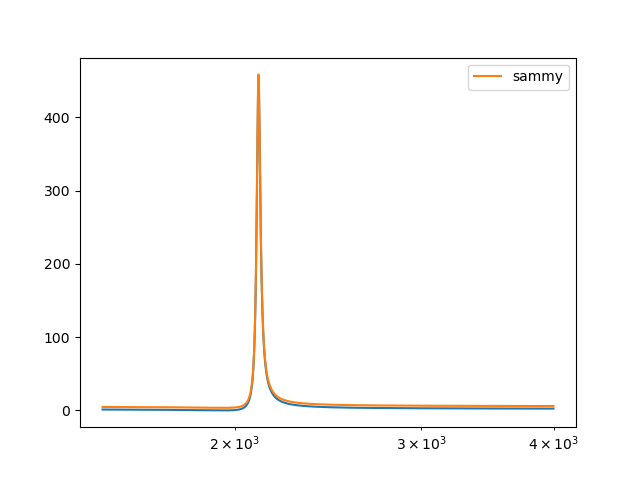

In [11]:
figure()

plot(E, xs_scat) # +3.625
# plot(E,xs_cap)

# plot(sammy_cap.E, sammy_cap.theo_xs, label='sammy')
plot(sammy_scat.E, sammy_scat.theo_xs, label='sammy')

# plot(E, xs_scat+3.625-sammy_scat.theo_xs)

xscale('log'); 
# yscale('log')
# xlim([1,1000])
legend()

In [12]:
# lst = syndat.sammy_interface.readlst('../synthetic_data/Ta181/postdoc_testdata/sammy1.dat')
# lst_trans = syndat.sammy_interface.readlst('../synthetic_data/Ta181/postdoc_testdata/sammy2_trans.dat')


In [13]:
# lst_test = syndat.sammy_interface.readlst('../synthetic_data/Ta181/postdoc_testdata/test.LST')
# # lst_test
# figure()
# scatter(lst_test.E, lst_test.exp, s=0.5)
# plot(lst_test.E, lst_test.theo_xs, 'k')
# xscale('log'); yscale('log')

In [14]:

# par

### Postdoc challenge problem

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Rel Error')

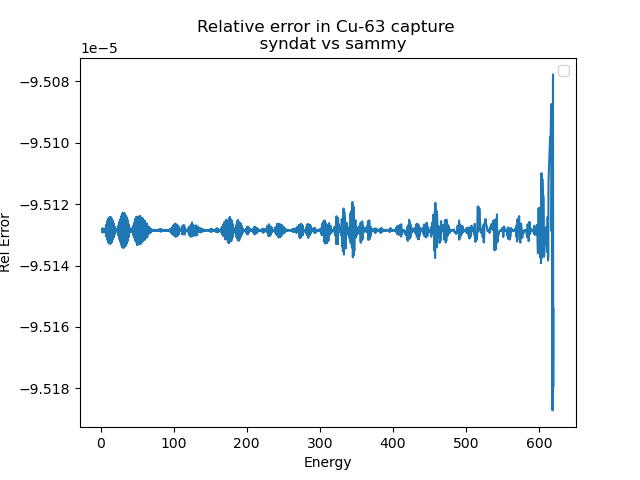

In [15]:
avg, par = syndat.sammy_interface.read_sammy_par('../synthetic_data/Ta181/postdoc_testdata/sammy1.par')
lst = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/postdoc_testdata/SAMMY.LST')
E = lst.E

# gj = 0.5625
# rho = 2.1846e-3
# xs = 0
# for row in par.iterrows():
#     # print(row[1].E)
#     E_lam = row[1].E
#     Gg = row[1].Gg*1e-3
#     Gn = row[1].Gn*1e-3

#     xs += (Gn*Gg*np.sqrt(E/E_lam)) / ( (E-E_lam)**2 + (Gn*np.sqrt(E/E_lam)+Gg)**2/4 )
# xs = (np.pi*gj/rho**2)*(1/E)*xs



k = syndat.scattering_theory.k_wavenumber(E, Ta_pair.M, Ta_pair.m)
g = syndat.scattering_theory.g(3, Ta_pair.I, Ta_pair.i)
noahs_xs = syndat.scattering_theory.SLBW_capture(g, k, E, par[['E','Gg','Gn']])


figure()
# plot(E, noahs_xs)
# plot(E, xs)
# plot(lst.E, lst.theo_xs, label='sammy')
plot(E, (noahs_xs-lst.theo_xs)/lst.theo_xs)
# xscale('log')
# yscale('log')
legend()
title('Relative error in Cu-63 capture \n  syndat vs sammy')
xlabel('Energy'); ylabel('Rel Error')


### Data I sent to Jake

In [16]:


# test = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/verify_slbw/2res_exp_xs')
# test

# figure()
# plot(lst.E, lst.exp_dat)
# xscale('log')
# yscale('log')

## Sample wig

In [17]:
wig1 = syndat.sample_wigner_invCDF(10000)*3
wig2 = syndat.sample_wigner_invCDF(10000)

total = np.append(wig1,wig2)

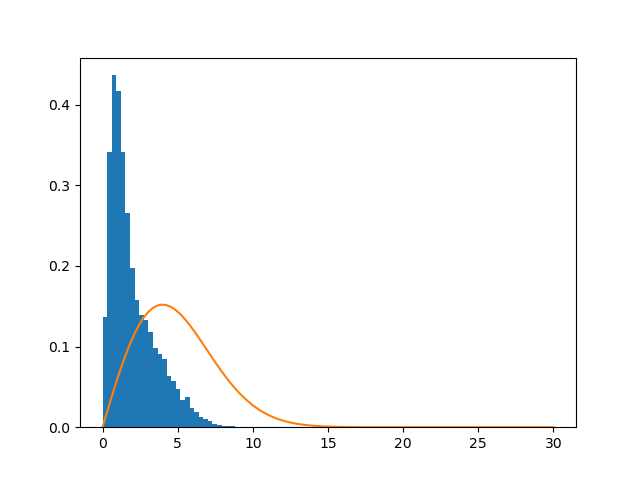

In [18]:
figure()
hist(total,bins=35,density=True)
plot(np.linspace(0,30,100),syndat.wigner_PDF(np.linspace(0,30,100), 5))